# 규제 선형 모델

- 회귀 모델은 적절히 데이터에 적합하면서도 회귀계수(x값 앞의 기울기?)가 기하급수적으로 커지는 것을 제어
- 최적 모델 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어
- 비용함수목표 = Min(RSS(W) + alpha*||W||^2)
- alpha를 0부터 지속적으로 값을 증가시키면 회귀계수 값(RSS(W))의 크기가 감소되어 과적합 개선
- 이런 것을 **규제(Regularization)**

### - 규제에는 L2, L1으로 구분

- **L2 규제**는 alpha*||W||^2에서 < W^2에 패널티 >를 부여
- **L1 규제**는 alpha*||W||에서 < |W|에 패널티 >를 부여

## - 릿지 (Ridge) 회귀

In [1]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
# boston 데이터 세트의 target배열은 주택 가격임. 이를 PRICE칼럼으로 DF에 추가
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3,
                                                   random_state=156)

In [19]:
# alpha=10으로 설정
ridge = Ridge(alpha=10)
mse_score = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * mse_score)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 MSE:', np.round(mse_score, 3))
print('5 folds의 개별 RMSE:', np.round(rmse_scores, 3))
print('5 folds의 개별 평균 MSE:', np.round(avg_rmse, 3))

5 folds의 개별 MSE: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 개별 평균 MSE: 5.518


- alpha 값을 변화

In [3]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score를 이용해 5 폴드 평균 RMSE 계산
    mse_scores = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * mse_scores))
    print('alpha {0}일때, 5folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0일때, 5folds의 평균 RMSE : 5.829
alpha 0.1일때, 5folds의 평균 RMSE : 5.788
alpha 1일때, 5folds의 평균 RMSE : 5.653
alpha 10일때, 5folds의 평균 RMSE : 5.518
alpha 100일때, 5folds의 평균 RMSE : 5.330


CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64
CRIM       -0.107474
ZN          0.046572
INDUS       0.015999
CHAS        2.670019
NOX       -16.684645
RM          3.818233
AGE        -0.000269
DIS        -1.459626
RAD         0.303515
TAX        -0.012421
PTRATIO    -0.940759
B           0.009368
LSTAT      -0.525966
dtype: float64
CRIM       -0.104595
ZN          0.047443
INDUS      -0.008805
CHAS        2.552393
NOX       -10.777015
RM          3.854000
AGE        -0.005415
DIS        -1.372654
RAD         0.290142
TAX        -0.012912
PTRATIO    -0.876074
B           0.009673
LSTAT      -0.533343
dtype: float64
CRIM      -0.101435
ZN         0.049579
INDUS     -0.042962
CHAS       1.952021
NOX       -2.371619
RM         3.702272
AGE       -0.010

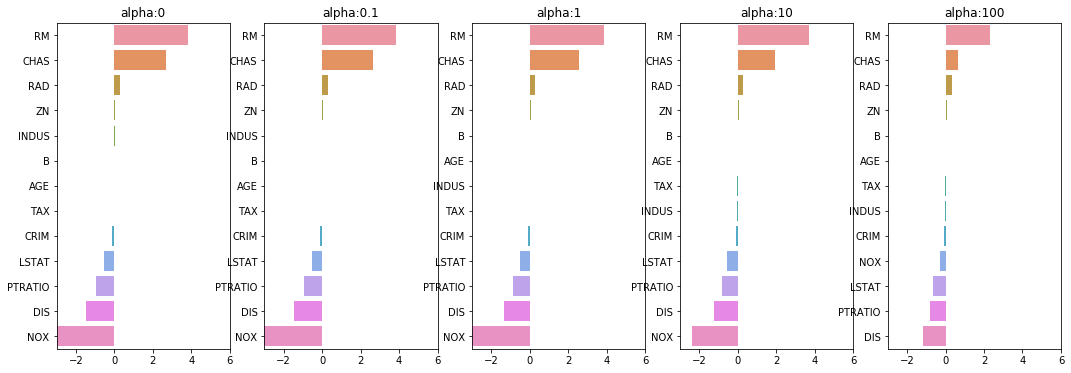

In [4]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 데이터 저장 DF 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_data, y_target)
    # alpha에 따른 피처별로 회귀계수를 Series로 변환, 이를 DF의 칼럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    print(coeff)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
# for 문 바깥에서 맷플롯립의 show 호출
# alpha에 따른 피쳐별 회귀 계수를 DataFrame으로 표시
print(coeff_df)
plt.show()

### 딱봐도 alpha values가 높아질수록 회귀계수가 작아짐

In [5]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## - 라쏘(Lasso) 회귀

In [6]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력, 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, x_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print('###########', model_name,'############')
    for param in params:
        if model_name == 'Ridge': model=Ridge(alpha=param)
        elif model_name == 'Lasso': model=Lasso(alpha=param)
        elif model_name == 'ElasticNet': model=ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, x_data_n, y_target_n,
                                        scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(x_data, y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
        coeff = pd.Series(data=model.coef_, index=x_data.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [11]:
# Lasso alpha를 정의하고 위 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, x_data_n=x_data, y_target_n=y_target)

########### Lasso ############
alpha 0.07일 때 5폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5폴드 세트의 평균 RMSE: 6.189


In [12]:
ridge_alphas = [0, 0.1, 1, 10, 100]
coeff_ridge_df = get_linear_reg_eval('Ridge', params=ridge_alphas, x_data_n=x_data, y_target_n=y_target)

########### Ridge ############
alpha 0일 때 5폴드 세트의 평균 RMSE: 5.829
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.788
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.653
alpha 10일 때 5폴드 세트의 평균 RMSE: 5.518
alpha 100일 때 5폴드 세트의 평균 RMSE: 5.330


In [13]:
# 반환된 coeff_lasso_df를 lasso_alphas[0] 첫번째 컬럼의 내림차순으로 회귀계수 DataFrame으로 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


### 딱봐도 alpha values가 높아질수록 회귀계수가 제거됨

## - 엘라스틱넷(ElasticNet) 회귀

In [14]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval()함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, x_data_n=x_data, y_target_n=y_target)

########### ElasticNet ############
alpha 0.07일 때 5폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5폴드 세트의 평균 RMSE: 6.068


In [15]:
# 변환된 coeff_elastic_df를 첫 번째 컬럼순으로 내림차순 정렬, 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
